In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 

Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


# 브라질 데이터

## 전처리


In [ ]:
import pandas as pd
df = pd.read_csv('./medical no show.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
# 남녀비율
# 노쇼인 사람들의 나이 
# 노쇼인 사람들의 지역

In [ ]:
## 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [ ]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [ ]:
#age = -1 data delete

df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
df = df.loc[df["Age"] != -1]

In [ ]:
df['ScheduledDay']

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: ScheduledDay, Length: 110526, dtype: object

In [ ]:
df[['date', 'time']] = df['ScheduledDay'].str.split(r"T", expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,09:15:35Z
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,07:27:33Z
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,16:03:52Z
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,15:09:23Z


In [ ]:
df.to_csv('./brasil_new.csv', index=False)

## 시간쪼개기


In [ ]:
import pandas as pd
df = pd.read_csv('./brasil_new.csv')
df

In [ ]:
df = df.rename(columns = {'ScheduledDay' : "ScheduledDate" , "AppointmentDay" : "AppointmentDate"})

In [ ]:
import numpy as np

df['ScheduledYear'] = df['ScheduledDate'].apply(lambda x: np.int(x[0:4]))
df['ScheduledMonth'] = df['ScheduledDate'].apply(lambda x: np.int(x[5:7]))
df['ScheduledDay'] = df['ScheduledDate'].apply(lambda x: np.int(x[8:10]))
df['ScheduledHour'] = df['ScheduledDate'].apply(lambda x: np.int(x[11:13]))
df['ScheduledMinute'] = df['ScheduledDate'].apply(lambda x: np.int(x[14:16]))
df['ScheduledSecond'] = df['ScheduledDate'].apply(lambda x: np.int(x[17:19]))
df['AppointmentYear'] = df['AppointmentDate'].apply(lambda x: np.int(x[0:4]))
df['AppointmentMonth'] = df['AppointmentDate'].apply(lambda x: np.int(x[5:7]))
df['AppointmentDay'] = df['AppointmentDate'].apply(lambda x: np.int(x[8:10]))

In [ ]:
df

In [ ]:
df.to_csv('./brasil_new.csv', index=False)

### 나이그룹 만들기

In [ ]:
rng = list(range(0, 120, 10))

In [ ]:
rng_label = [str(x) + '대' for x in rng]

In [ ]:
rng_label

['0대',
 '10대',
 '20대',
 '30대',
 '40대',
 '50대',
 '60대',
 '70대',
 '80대',
 '90대',
 '100대',
 '110대']

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], rng, right = False, labels = rng_label[:-1])
#right = False 는 부등호 이하 (포함시키겠다)
#right = True 는 부등호 미만 (포함시키지 않겠다)

In [ ]:
df

In [ ]:
df.to_csv('./brasil_new.csv', index=False)

# 분석시작



### 나이별 노쇼비율

In [ ]:
df[df['AgeGroup'] == '60대']

In [ ]:
x = df['No-show'].eq('Yes').groupby(df.AgeGroup).mean().reset_index(name = 'proportion_by_age_group')

In [ ]:
x['proportion_by_age_group'] = x['proportion_by_age_group']*100

In [ ]:
x

,AgeGroup,proportion_by_age_group
0,0대,19.937053
1,10대,25.177798
2,20대,24.673334
3,30대,21.752027
4,40대,20.268844
5,50대,17.499842
6,60대,15.072415
7,70대,15.200539
8,80대,15.784114
9,90대,20.197044


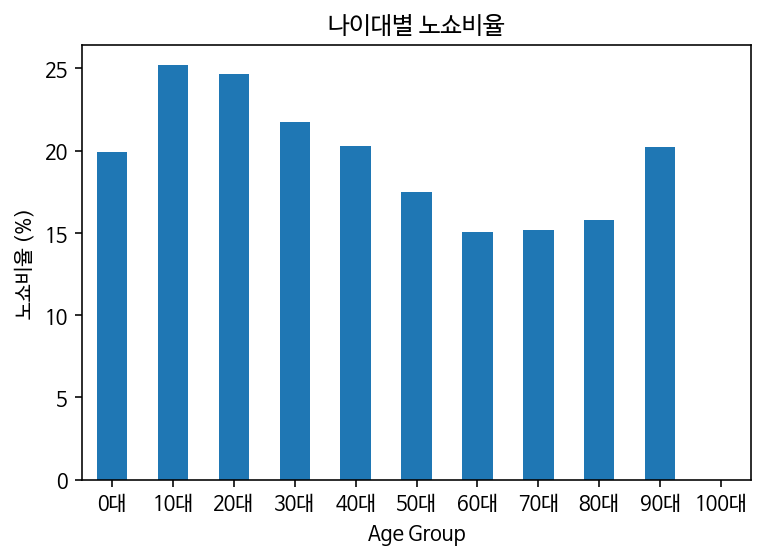

In [ ]:
x.plot.bar(x = 'AgeGroup', y = 'proportion_by_age_group', rot = 0,
           xlabel = 'Age Group', ylabel = '노쇼비율 (%)', 
           title = '나이대별 노쇼비율', legend = 0)
plt.show()

### 지역별 노쇼비율




In [ ]:
a = df['No-show'].eq('Yes').groupby(df.Neighbourhood).mean().reset_index(name = 'proportion_by_Neighbourhood')

In [ ]:
a['proportion_by_Neighbourhood'] = a['proportion_by_Neighbourhood']*100

In [ ]:
a = a.sort_values('proportion_by_Neighbourhood', ascending = False)

In [ ]:
a

,Neighbourhood,proportion_by_Neighbourhood
34,ILHAS OCEÂNICAS DE TRINDADE,100.000000
70,SANTOS DUMONT,28.918495
61,SANTA CECÍLIA,27.455357
62,SANTA CLARA,26.482213
36,ITARARÉ,26.266363
...,...,...
73,SOLON BORGES,14.712154
48,MÁRIO CYPRESTE,14.555256
0,AEROPORTO,12.500000
31,ILHA DO BOI,8.571429


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 194 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 194 missing from current font.
  font.set_text(s, 0, f

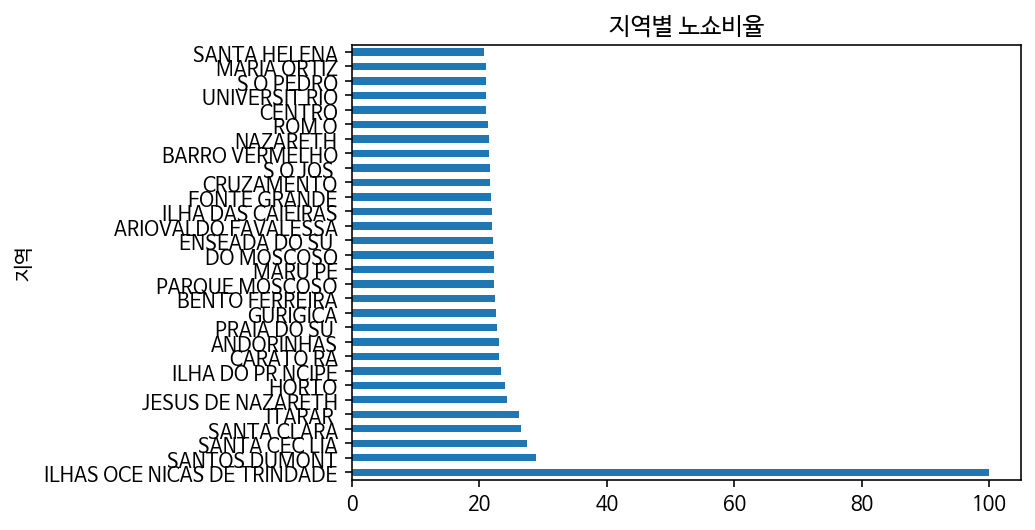

In [ ]:
a.plot.barh(x = 'Neighbourhood', y = 'proportion_by_Neighbourhood', rot = 0,
           xlabel = '지역', ylabel = '노쇼비율 (%)', 
           title = '지역별 노쇼비율', legend = 0)
plt.show()

In [ ]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z,60대
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z,50대
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z,60대
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z,0대
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,09:15:35Z,50대
110522,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,07:27:33Z,50대
110523,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,16:03:52Z,20대
110524,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,15:09:23Z,30대


### 성별에 따른 노쇼비율

In [ ]:
g = df['No-show'].eq('Yes').groupby(df.Gender).mean().reset_index(name = 'proportion_by_gender')

In [ ]:
g

,Gender,proportion_by_gender
0,F,0.203149
1,M,0.199679


In [ ]:
df

### 날짜계산 - 기다림에 따른 노쇼비율

In [ ]:
import numpy as np

df['오전/오후'] = np.where(df['ScheduledHour'] > 12 ,'오후','오전')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df[['a_date', 'a_time']] = df['AppointmentDate'].str.split(r"T", expand=True)

In [ ]:
df['a_date'] = pd.to_datetime(df['a_date'])

In [ ]:
df['날짜차이'] = df['a_date'] - df['date']


In [ ]:
df["날짜차이"] = (df["날짜차이"]).dt.days

In [ ]:
df["날짜차이"].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

In [ ]:
rng2 = list(range(0, 180, 30))
rng2

[0, 30, 60, 90, 120, 150]

In [ ]:
rng2_label = [str(x) for x in rng2]

In [ ]:
df['날짜차이그룹'] = pd.cut(df['날짜차이'], rng2, right = False, labels = rng2_label[:-1])


In [ ]:
p = df['No-show'].eq('Yes').groupby(df['날짜차이그룹']).mean().reset_index(name = 'proportion_by_date')

In [ ]:
p['proportion_by_date'] = p['proportion_by_date']*100

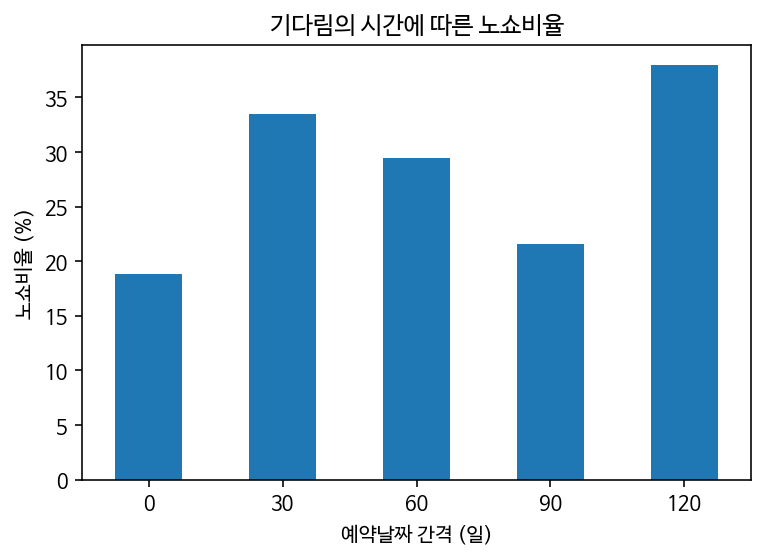

In [ ]:
p.plot.bar(x = '날짜차이그룹', y = 'proportion_by_date', rot = 0,
           xlabel = '예약날짜 간격 (일)', ylabel = '노쇼비율 (%)', 
           title = '기다림의 시간에 따른 노쇼비율', legend = 0)
plt.show()

In [ ]:
#from datetime import datetime

#def days_between(d1, d2):
#    d1 = datetime.strptime(d1, "%Y-%m-%d")
#    d2 = datetime.strptime(d2, "%Y-%m-%d")
#   return abs((d2 - d1).days)

#days_between(a[100], b[100])
    


17

### 약속시간 (오전/오후)에 따른 노쇼비율

In [ ]:
h = df['No-show'].eq('Yes').groupby(df['오전/오후']).mean().reset_index(name = 'proportion_by_timeset')

In [ ]:
h

,오전/오후,proportion_by_timeset
0,오전,0.189657
1,오후,0.226709


In [ ]:
h['proportion_by_timeset'] = h['proportion_by_timeset']*100

In [ ]:
h

,오전/오후,proportion_by_timeset
0,오전,18.965657
1,오후,22.670926


### 월별 노쇼비율


In [ ]:
m = df['No-show'].eq('Yes').groupby(df['AppointmentMonth']).mean().reset_index(name = 'proportion_by_month')
m

,AppointmentMonth,proportion_by_month
0,4,0.195672
1,5,0.207865
2,6,0.184575


## 끝내기 전에 저장하기 엉엉

In [ ]:
df.to_csv('./brasil_final_0715.csv')

In [ ]:
df1 = pd.read_csv('brasil_final_0715.csv')
df1

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledHour,ScheduledMinute,ScheduledSecond,AppointmentYear,AppointmentMonth,AppointmentDay,AgeGroup,오전/오후,a_date,a_time,k,날짜차이,날짜차이그룹
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z,2016,4,29,18,38,8,2016,4,29,60대,오후,2016-04-29,00:00:00Z,0 days,0,0.0
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z,2016,4,29,16,8,27,2016,4,29,50대,오후,2016-04-29,00:00:00Z,0 days,0,0.0
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z,2016,4,29,16,19,4,2016,4,29,60대,오후,2016-04-29,00:00:00Z,0 days,0,0.0
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z,2016,4,29,17,29,31,2016,4,29,0대,오후,2016-04-29,00:00:00Z,0 days,0,0.0
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z,2016,4,29,16,7,23,2016,4,29,50대,오후,2016-04-29,00:00:00Z,0 days,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,110521,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,09:15:35Z,2016,5,3,9,15,35,2016,6,7,50대,오전,2016-06-07,00:00:00Z,35 days,35,30.0
110522,110522,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,07:27:33Z,2016,5,3,7,27,33,2016,6,7,50대,오전,2016-06-07,00:00:00Z,35 days,35,30.0
110523,110523,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,16:03:52Z,2016,4,27,16,3,52,2016,6,7,20대,오후,2016-06-07,00:00:00Z,41 days,41,30.0
110524,110524,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,15:09:23Z,2016,4,27,15,9,23,2016,6,7,30대,오후,2016-06-07,00:00:00Z,41 days,41,30.0


## 하나 해보기

In [ ]:
import pandas as pd

df = pd.read_csv('Brazil_new_new.csv')
df


,Unnamed: 0,Unnamed: 0.1,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledHour,ScheduledMinute,ScheduledSecond,AppointmentYear,AppointmentMonth,AppointmentDay,AgeGroup,오전/오후,a_date,a_time,k,날짜차이,날짜차이그룹,ScheduledYMD,AppointmentYMD,진료요일
0,0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z,2016,4,29,18,38,8,2016,4,29,60대,오후,2016-04-29,00:00:00Z,0 days,0,0.0,2016-04-29,2016-04-29,Fri
1,1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z,2016,4,29,16,8,27,2016,4,29,50대,오후,2016-04-29,00:00:00Z,0 days,0,0.0,2016-04-29,2016-04-29,Fri
2,2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z,2016,4,29,16,19,4,2016,4,29,60대,오후,2016-04-29,00:00:00Z,0 days,0,0.0,2016-04-29,2016-04-29,Fri
3,3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z,2016,4,29,17,29,31,2016,4,29,0대,오후,2016-04-29,00:00:00Z,0 days,0,0.0,2016-04-29,2016-04-29,Fri
4,4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z,2016,4,29,16,7,23,2016,4,29,50대,오후,2016-04-29,00:00:00Z,0 days,0,0.0,2016-04-29,2016-04-29,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,110521,110521,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,09:15:35Z,2016,5,3,9,15,35,2016,6,7,50대,오전,2016-06-07,00:00:00Z,35 days,35,30.0,2016-05-03,2016-06-07,Tue
110522,110522,110522,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,07:27:33Z,2016,5,3,7,27,33,2016,6,7,50대,오전,2016-06-07,00:00:00Z,35 days,35,30.0,2016-05-03,2016-06-07,Tue
110523,110523,110523,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,16:03:52Z,2016,4,27,16,3,52,2016,6,7,20대,오후,2016-06-07,00:00:00Z,41 days,41,30.0,2016-04-27,2016-06-07,Tue
110524,110524,110524,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,15:09:23Z,2016,4,27,15,9,23,2016,6,7,30대,오후,2016-06-07,00:00:00Z,41 days,41,30.0,2016-04-27,2016-06-07,Tue


In [ ]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [ ]:
df['No-show'].value_counts(normalize=True) * 100

No     79.806561
Yes    20.193439
Name: No-show, dtype: float64